In [1]:
import numpy as np

In [11]:
np.set_printoptions(edgeitems=5,linewidth=80,precision=4,suppress=True,threshold=10)
cent = np.array([0,0],dtype="float64")
pnts = np.array([[1,1],[1,2],[-3,3],[-4,-4],[5,-5]],dtype="float64")
Xs = pnts[:,0]
Ys = pnts[:,1]
diff = pnts-cent
angles= np.degrees(np.arctan2(diff[:,1],diff[:,0]))
dist = np.hypot(diff[:,0],diff[:,1])
data = np.vstack((Xs,Ys,angles,dist)).T

print("Origin (0,0)\n   {:<10s} {:<10s} {:<10s} {:<10s}".format("Xs","Ys","angles","dist"))
print("{}".format(data))

Origin (0,0)
   Xs         Ys         angles     dist      
[[   1.        1.       45.        1.4142]
 [   1.        2.       63.4349    2.2361]
 [  -3.        3.      135.        4.2426]
 [  -4.       -4.     -135.        5.6569]
 [   5.       -5.      -45.        7.0711]]


In [29]:
angles= np.degrees(np.arctan2(diff[:,1],diff[:,0]))
dist = np.hypot(diff[:,0],diff[:,1])
dist
diff
cent
pnts
diff
# angles

array([[ 1.,  1.],
       [ 1.,  2.],
       [-3.,  3.],
       [-4., -4.],
       [ 5., -5.]])

In [4]:
# Now only distance and angle are known.  Calculate the point coordinates from distance and angle
angles= np.degrees(np.arctan2(diff[:,1],diff[:,0]))
dist = np.hypot(diff[:,0],diff[:,1])
rads = np.deg2rad(angles)
sines = np.sin(rads)
coses = np.cos(rads)
Xn = sines * dist
Yn = coses * dist
data = np.vstack((angles,dist,Xs,Ys)).T

print("Origin (0,0)\n  {:<10s} {:<10s} {:<10s} {:<10s}".format("angles","dist","Xn","Yn"))
print("{}".format(data))

Origin (0,0)
  angles     dist       Xn         Yn        
[[  45.        1.4142    1.        1.    ]
 [  63.4349    2.2361    1.        2.    ]
 [ 135.        4.2426   -3.        3.    ]
 [-135.        5.6569   -4.       -4.    ]
 [ -45.        7.0711    5.       -5.    ]]


In [26]:
N = len(Xs)
Xc = np.empty(N)
Xc.fill(0.) # coincidently 0,0 is used as the center
Yc = np.empty(N)
Yc.fill(0.)
pairs = np.array(list(zip(Xc,Yc,Xs,Ys)))
print("final from Xc,Yc,Xs,Ys\n{}".format(pairs))

final from Xc,Yc,Xs,Ys
[[ 0.  0.  1.  1.]
 [ 0.  0.  1.  2.]
 [ 0.  0. -3.  3.]
 [ 0.  0. -4. -4.]
 [ 0.  0.  5. -5.]]


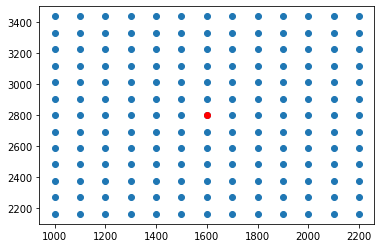

In [53]:
lat, lon = 1600,2800  #center coordinate
dist, coors = 100, 6 #meters, num coordinates in each direction
#Creating the offset grid
mini, maxi = -dist*coors, dist*coors
n_coord = coors*2+1
axis = np.linspace(mini, maxi, n_coord)
X, Y = np.meshgrid(axis, axis)
#avation formulate for offsetting the latlong by offset matrices
R = 1 #earth's radius
dLat = X/R
dLon = Y/(R*np.cos(np.pi*lat/180))
latO = lat + dLat #* 180/np.pi
lonO = lon + dLon #* 180/np.pi
#stack x and y latlongs and get (lat,long) format
output = np.stack([latO , lonO]).transpose(1,2,0)
output.shape
import matplotlib.pyplot as plt

points = output.reshape(-1,2)
x = points[:,0]
y = points[:,1]

plt.scatter(x,y)              #<- plot all points
plt.scatter(lat,lon,color='r') #<- plot the center lat long


1600 3000
934 3076


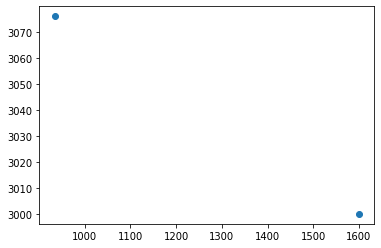

In [192]:
import math
import random
x1, y1 = 1600, 3000
x2, y2 = random.randint(x1 - 1000, x1 + 100), random.randint(y1-100, y1 +100)


print(x1, y1)
print(x2, y2)


dist = math.hypot(x2 - x1, y2 - y1)
dist
plt.scatter([x1,x2],[y1,y2])  

[   0. 6399.]
[   0. 3559.]
2
2
3559.0
1779.5
[[   0.    0.]
 [6399.    0.]
 [   0. 3559.]
 [6399. 3559.]]
100


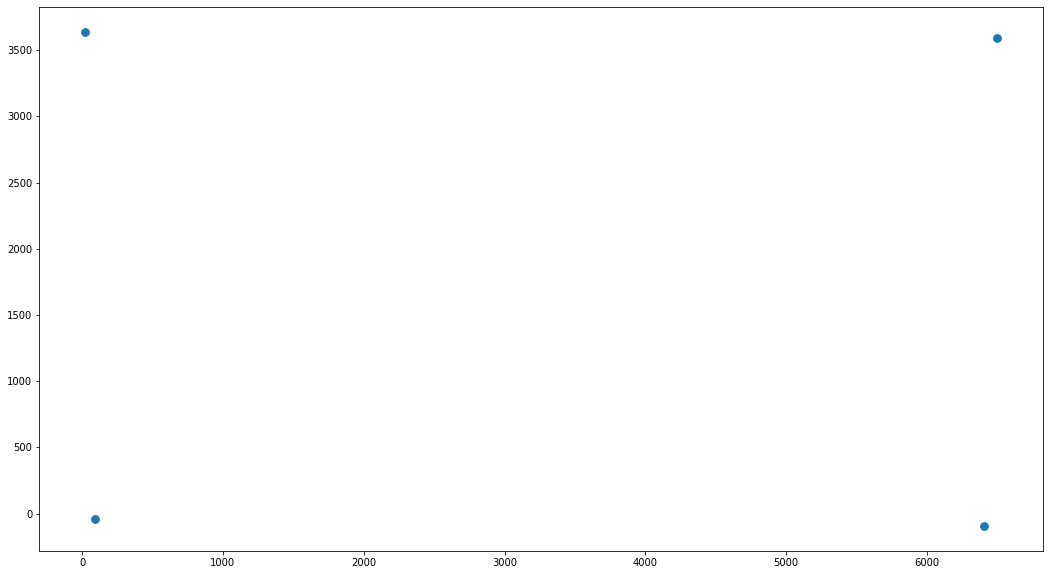

In [319]:
# specify params
n = 2
shape = np.array([3560, 6400])
sensitivity = 0.5 # 0 means no movement, 1 means max distance is init_dist

# compute grid shape based on number of points
width_ratio = shape[1] / shape[0]
num_y = np.int32(np.sqrt(n / width_ratio)) + 1
num_x = np.int32(n / num_y) + 1

# create regularly spaced neurons
x = np.linspace(0., shape[1]-1, num_x, dtype=np.float32)
y = np.linspace(0., shape[0]-1, num_y, dtype=np.float32)
coords = np.stack(np.meshgrid(x, y), -1).reshape(-1,2)
print(x)
print(y)
print(num_x)
print(num_y)
# compute spacing
init_dist = np.min((x[1]-x[0], y[1]-y[0]))
min_dist = init_dist * (1 - sensitivity)

assert init_dist >= min_dist

# print(coords)
print(init_dist)
print(min_dist)
print(coords)

# perturb points
max_movement = (init_dist - min_dist)/2
max_movement = 100
noise = np.random.uniform(
    low=-max_movement,
    high=max_movement,
    size=(len(coords), 2))
coords += noise

print(max_movement)

# plot
plt.figure(figsize=(10*width_ratio,10))
plt.scatter(coords[:,0], coords[:,1], s=60)
plt.show()

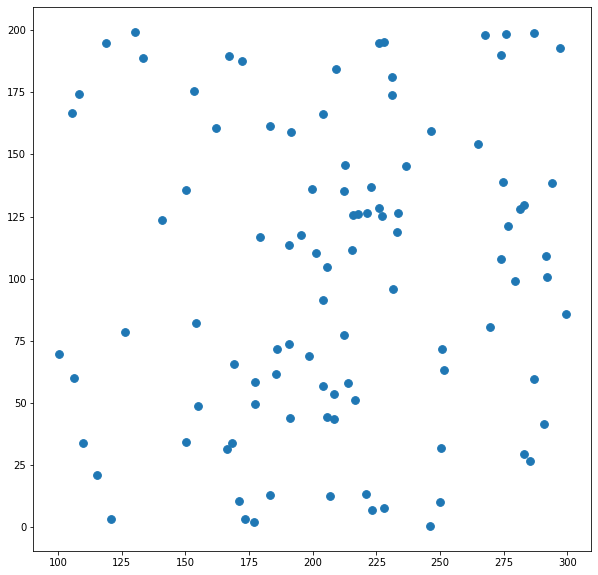

In [406]:

def get_random_point(coord, max_dist, max_cotys):
    coord = np.array(coord, dtype=np.float64)
    coords = []
    for coty in range(max_cotys):
        coord_copy = coord.copy()
        noise = np.random.uniform(
        low=-max_dist,
        high=max_dist,
        size=len(coord_copy))
        coord_copy += noise
        coords.append(coord_copy)
    return coords

coords = np.array(get_random_point((200, 100), 100, 100))
coords
# plot
plt.figure(figsize=(10,10))
plt.scatter(coords[:,0], coords[:,1], s=60)
plt.show()

In [381]:
[get_random_point((200, 100), 100) for x in range(0,10)]

[array([232.8866,  72.0263]),
 array([104.6878, 103.4823]),
 array([112.0109, 106.9419]),
 array([256.7422,  73.5624]),
 array([171.724 , 113.0891]),
 array([188.9209,  62.7031]),
 array([270.6685,  78.8677]),
 array([261.6971, 164.3378]),
 array([145.1585,  94.5565]),
 array([250.3454, 113.6475])]

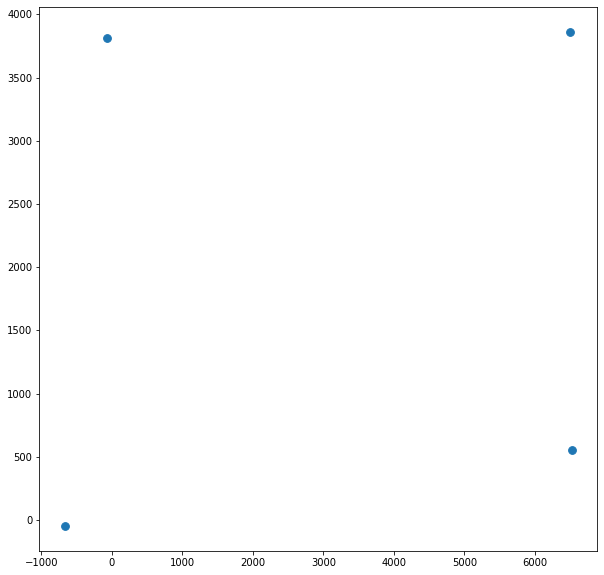

In [398]:
def generate_points_with_min_distance(n, shape, min_dist):
    # compute grid shape based on number of points
    width_ratio = shape[1] / shape[0]
    num_y = np.int32(np.sqrt(n / width_ratio)) + 1
    num_x = np.int32(n / num_y) + 1

    # create regularly spaced neurons
    x = np.linspace(0., shape[1]-1, num_x, dtype=np.float32)
    y = np.linspace(0., shape[0]-1, num_y, dtype=np.float32)
    coords = np.stack(np.meshgrid(x, y), -1).reshape(-1,2)

    # compute spacing
    init_dist = np.min((x[1]-x[0], y[1]-y[0]))

    # perturb points
    max_movement = (init_dist - min_dist)/2
    noise = np.random.uniform(low=-max_movement,
                                high=max_movement,
                                size=(len(coords), 2))
    coords += noise

    return coords
n = 2
shape = np.array([3400, 6400])
dist = 1
coords = generate_points_with_min_distance(n, shape, min_dist)
# coords = generate_points_with_min_distance(n=8, shape=(2448,2448), min_dist=256)

# plot
plt.figure(figsize=(10,10))
plt.scatter(coords[:,0], coords[:,1], s=60)
plt.show()